# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech


- Nama: Agung Firmansyah
- Email: agungfir98@gmail.com
- Id Dicoding: agung_firmansyah98


## Persiapan


In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample, shuffle
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import joblib

## Data Understanding


In [29]:
df = pd.read_csv("student-performance.csv", index_col=False)
pd.set_option('display.max_columns', 500)
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.00,0,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.00,0,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.00,0,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.43,0,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.33,0,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [30]:
rounded_columns = ['Curricular_units_1st_sem_grade',
                   'Curricular_units_2nd_sem_grade']
df.loc[:, rounded_columns] = df[['Curricular_units_1st_sem_grade',
                                 'Curricular_units_2nd_sem_grade']].round(2)
df.rename(columns={"Nacionality": "Nationality"}, inplace=True)
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.00,0,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.00,0,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.00,0,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.43,0,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.33,0,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nationality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Berdasarkan informasi dataset diatas didapati bahwa data memiliki beberapa kolum dengan tipe data yang perlu disesuaikan.

In [32]:
categorical_column = ["Marital_status", "Application_mode", "Course", "Daytime_evening_attendance", "Previous_qualification", "Nationality", "Mothers_qualification", "Fathers_qualification",
                      "Mothers_occupation", "Fathers_occupation", "Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International", "Status"]
ordinal_column = ["Application_order"]
numeric_column = ["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment", "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade",
                  "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_grade", "Curricular_units_2nd_sem_without_evaluations", "Unemployment_rate", "Inflation_rate",	"GDP"]

In [33]:
df[categorical_column + ordinal_column] = df[categorical_column + ordinal_column].astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nationality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

In [35]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.000000,4424.0,4424.0,4424.0,4424.0,4424.0,4424.000000,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.000000,4424.0,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6.0,18.0,8.0,17.0,2.0,17.0,NaN,21.0,29.0,34.0,32.0,46.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,1.0,1.0,1.0,9500.0,1.0,1.0,NaN,1.0,1.0,37.0,9.0,9.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919.0,1708.0,3026.0,766.0,3941.0,3717.0,NaN,4314.0,1069.0,1209.0,1577.0,1010.0,NaN,2426.0,4373.0,3921.0,3896.0,2868.0,3325.0,NaN,4314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,NaN,NaN,126.978119,NaN,NaN,NaN,NaN,NaN,NaN,23.265145,NaN,0.709991,6.270570,8.299051,4.706600,10.640848,0.137658,0.541817,6.232143,8.063291,4.435805,10.230201,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,NaN,NaN,14.482001,NaN,NaN,NaN,NaN,NaN,NaN,7.587816,NaN,2.360507,2.480178,4.179106,3.094238,4.843666,0.690880,1.918546,2.195951,3.947951,3.014764,5.210819,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,NaN,NaN,117.900000,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,NaN,NaN,126.100000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,6.000000,8.000000,5.000000,12.290000,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,NaN,NaN,134.800000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.330000,0.000000,13.900000,2.600000,1.790000,NaN


Tidak terlihat ada anomali dalam data, data bersih dan masuk akal.

## Exploratory Data Analysis

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


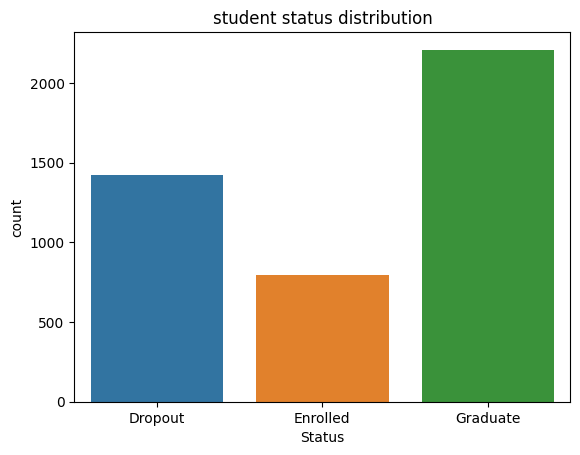

In [36]:
print(df['Status'].value_counts())

sns.countplot(data=df, x="Status", hue="Status")
plt.title("student status distribution")
plt.show()

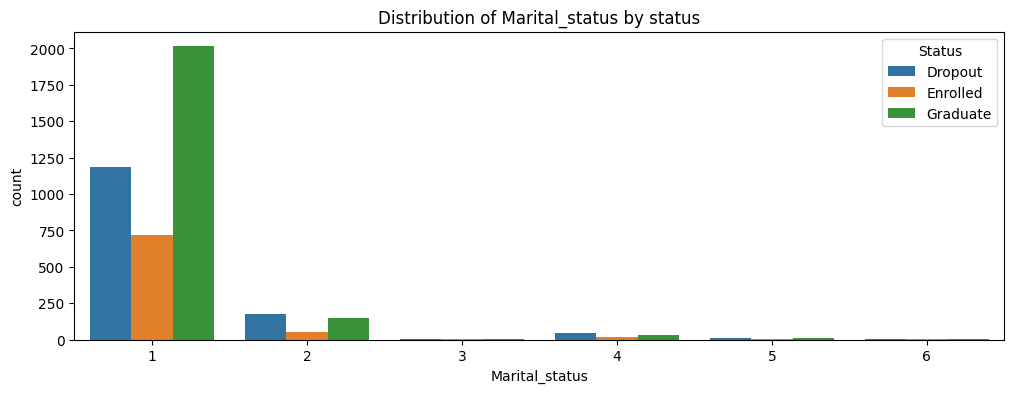

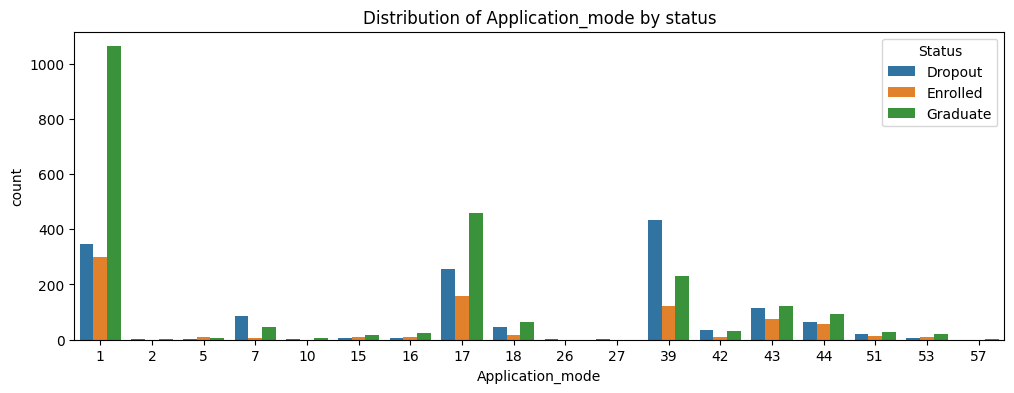

c:\Users\imchu\projects\ds-mahir-submission-akhir\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


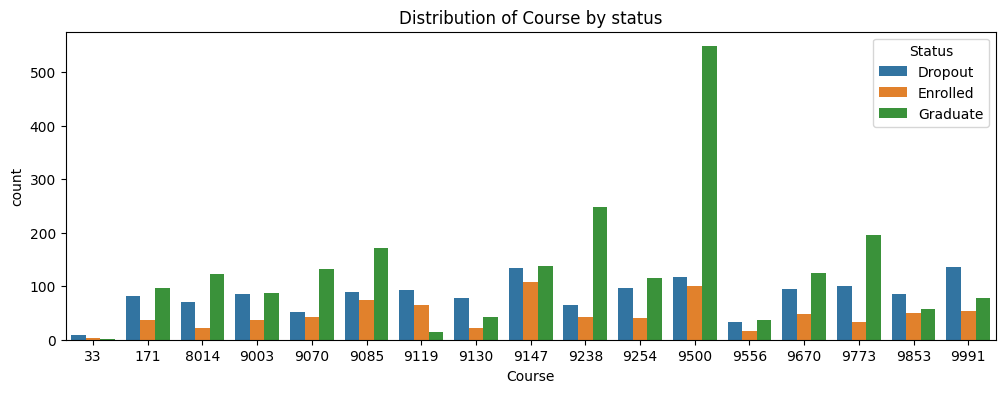

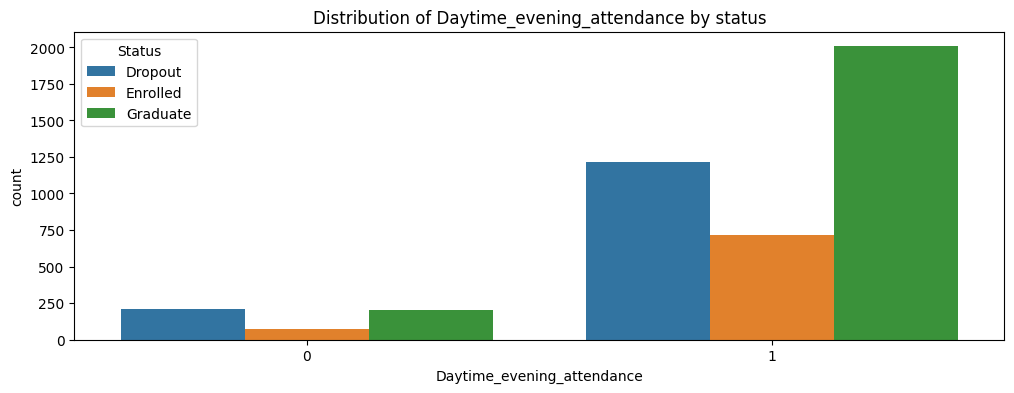

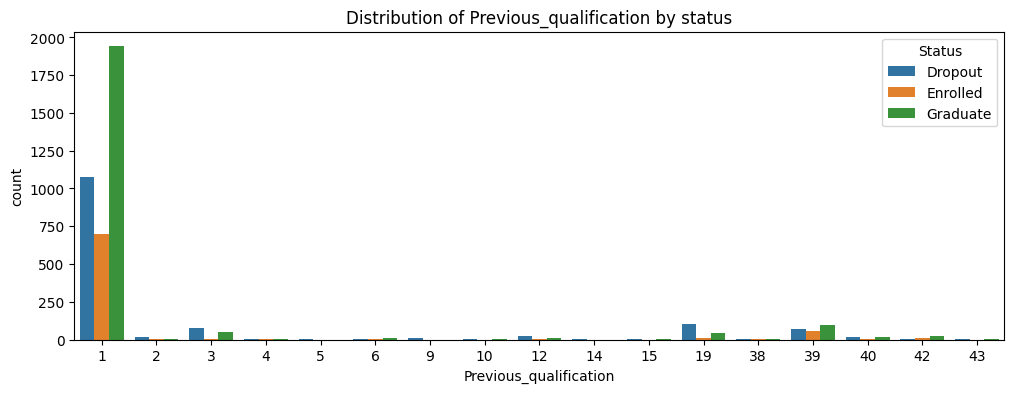

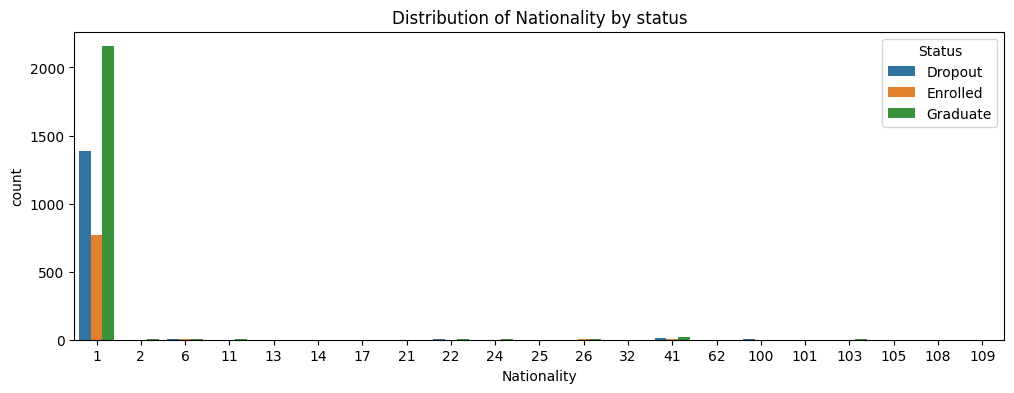

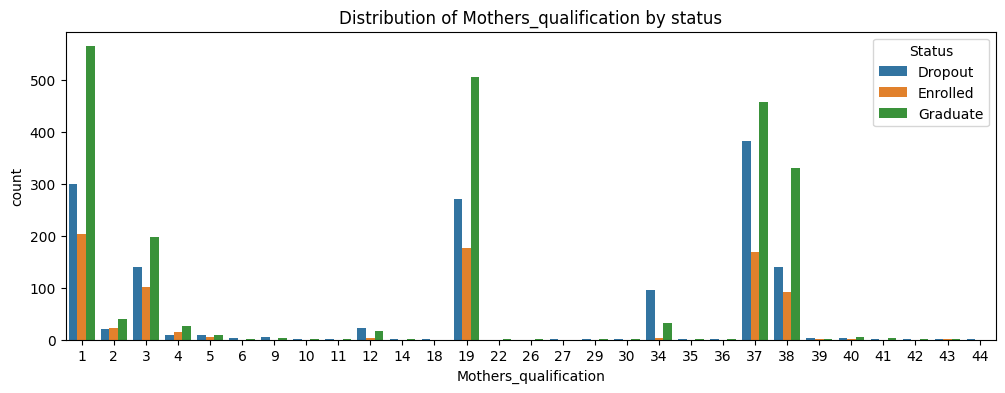

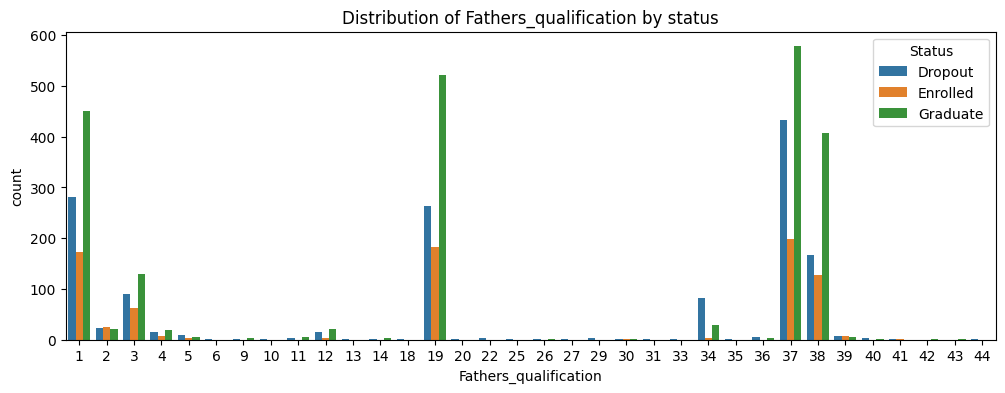

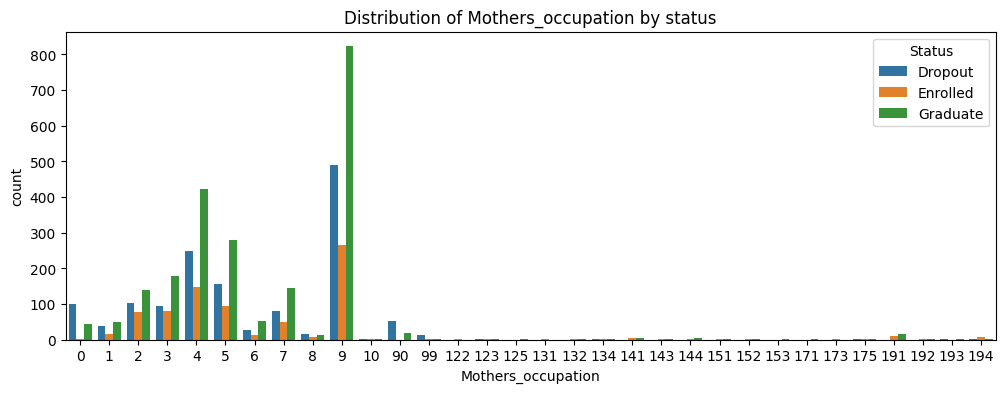

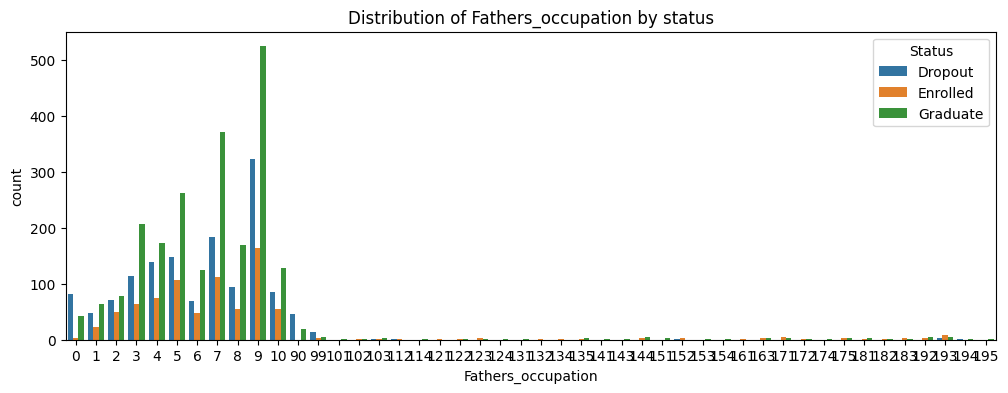

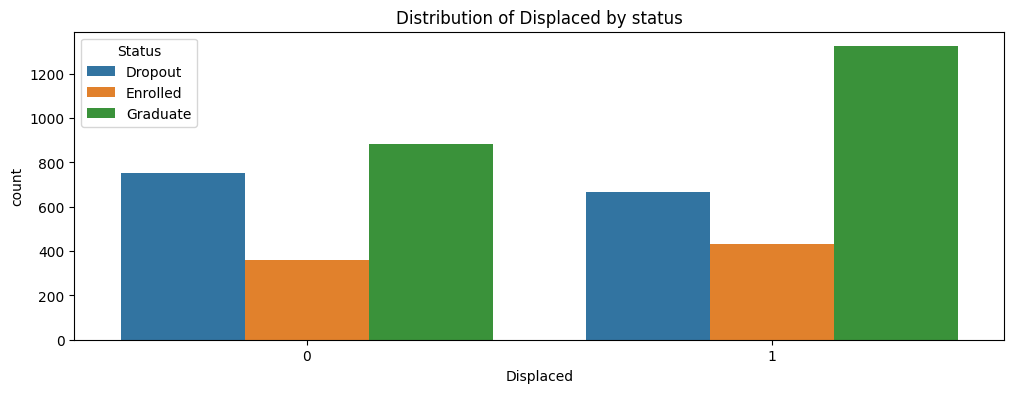

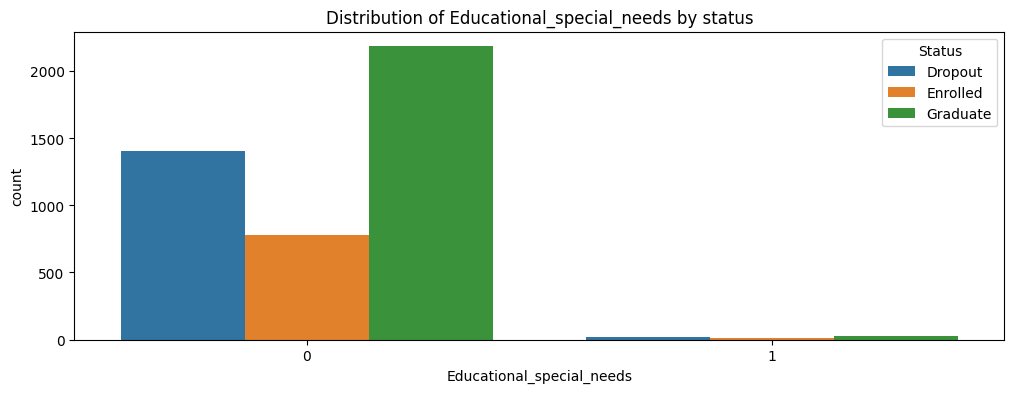

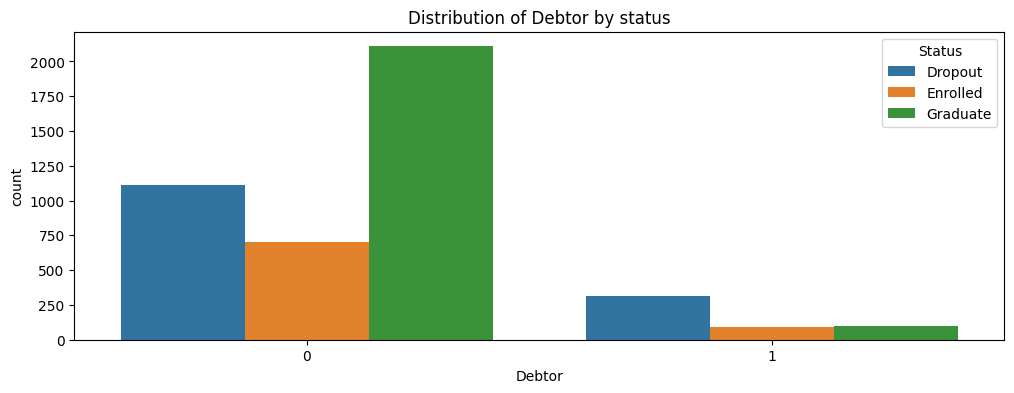

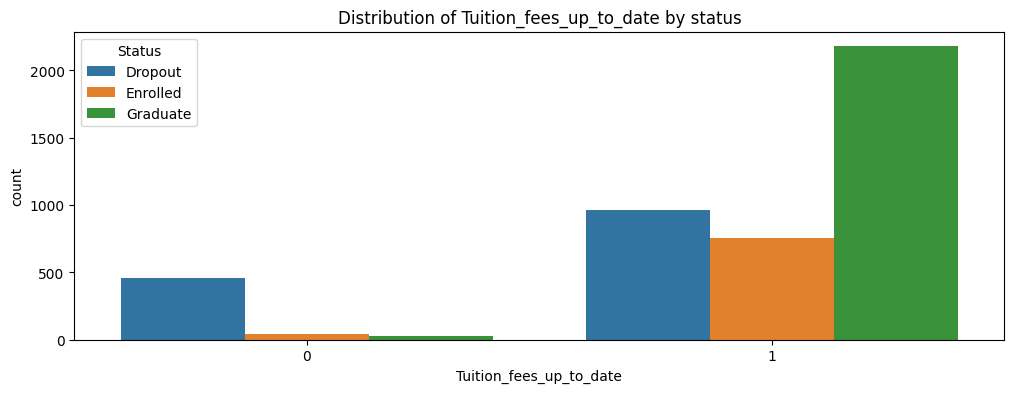

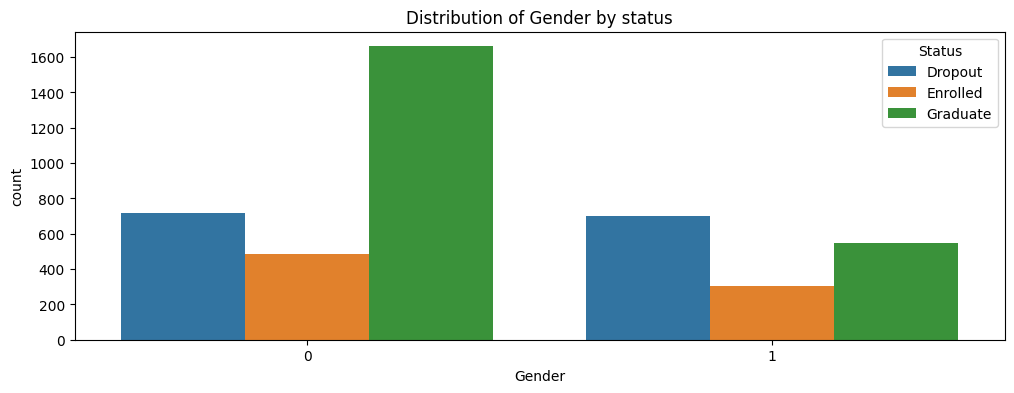

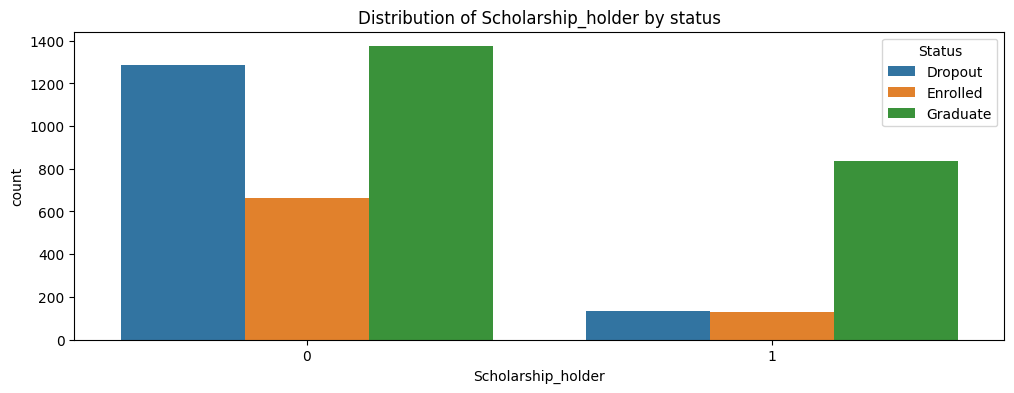

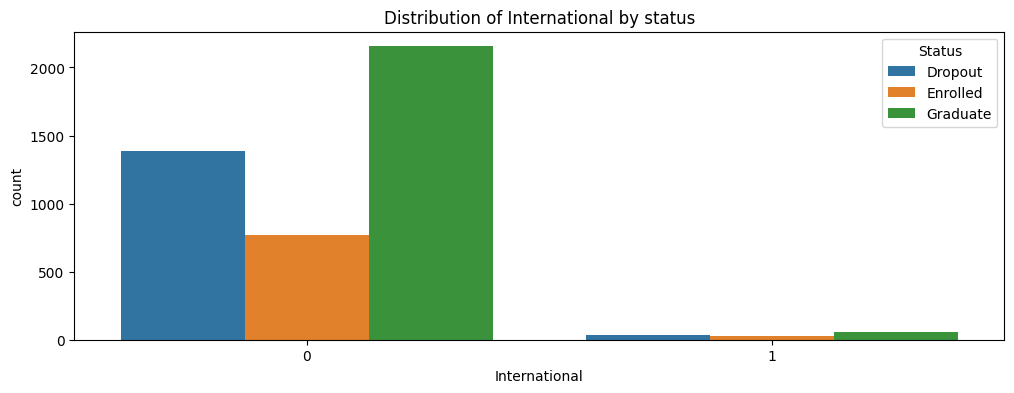

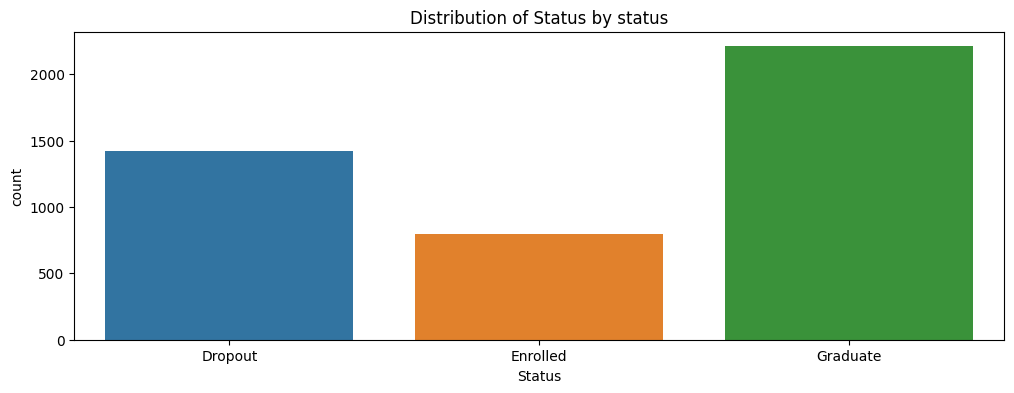

In [37]:
for col in categorical_column:
  plt.figure(figsize=(12,4))
  sns.countplot(data=df, x=col, hue="Status")
  plt.title(f"Distribution of {col} by status")
  plt.show()

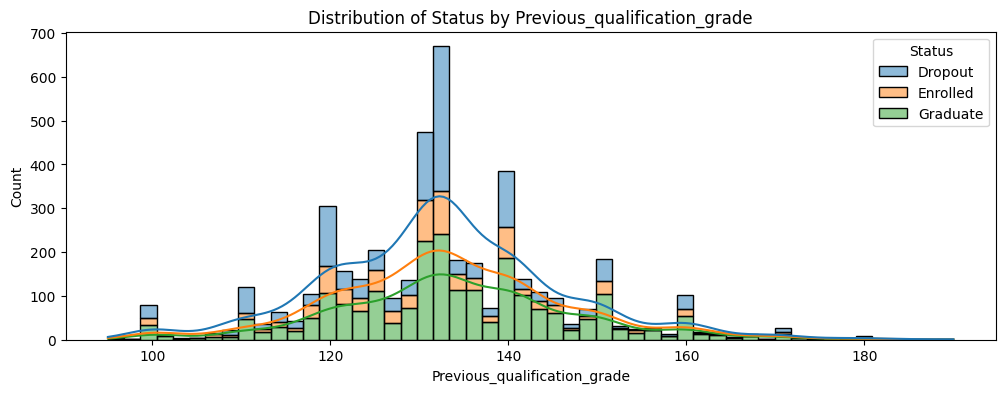

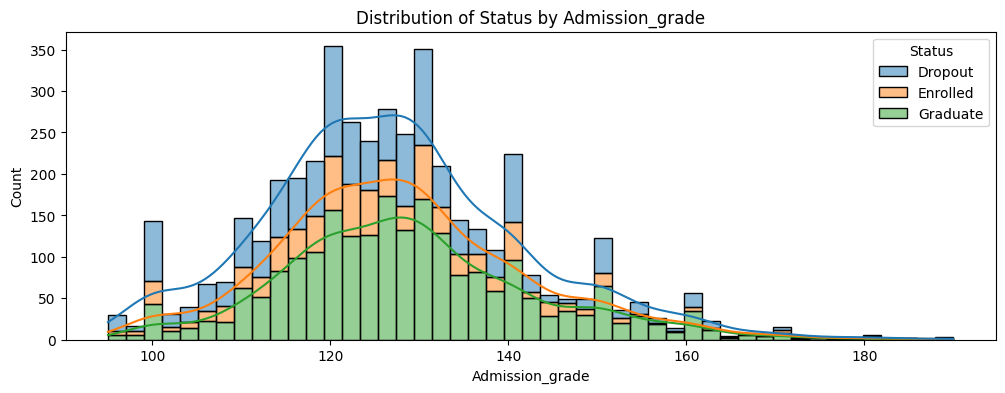

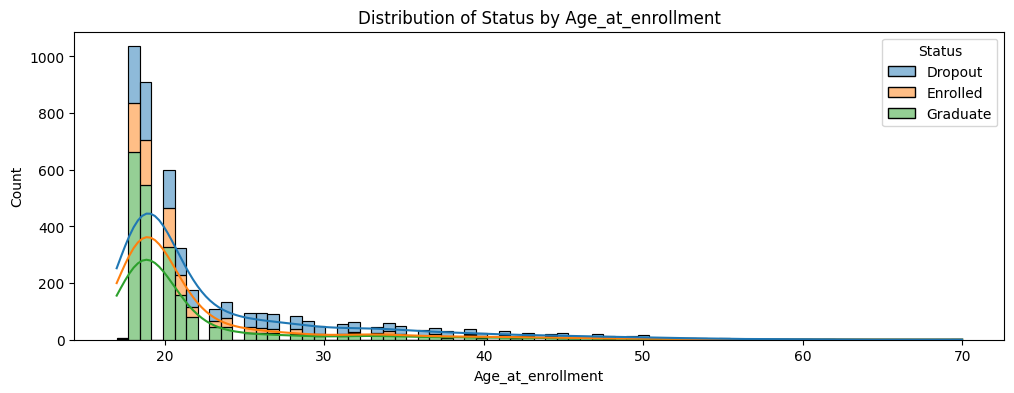

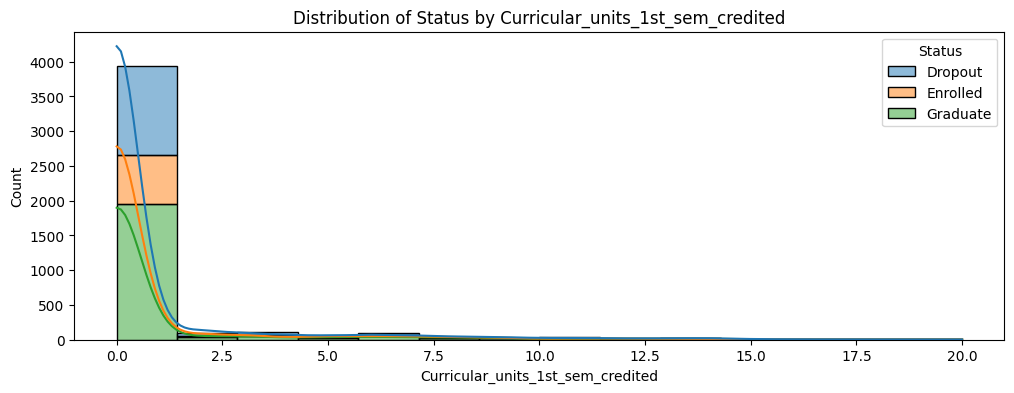

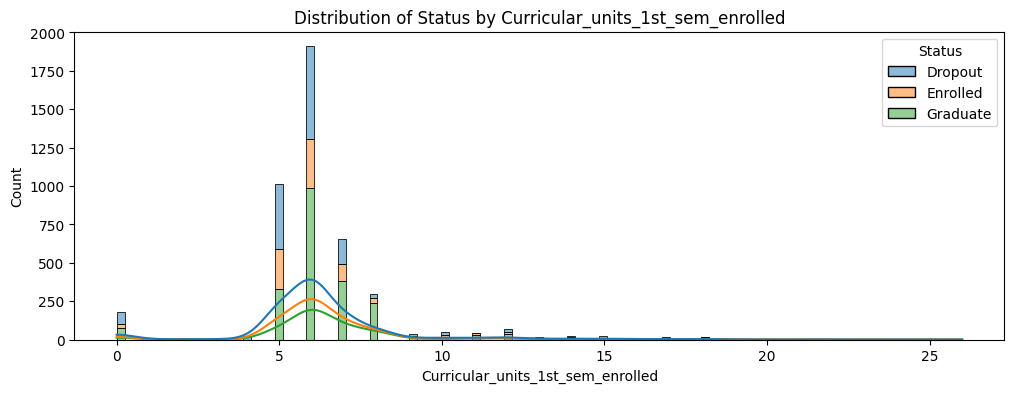

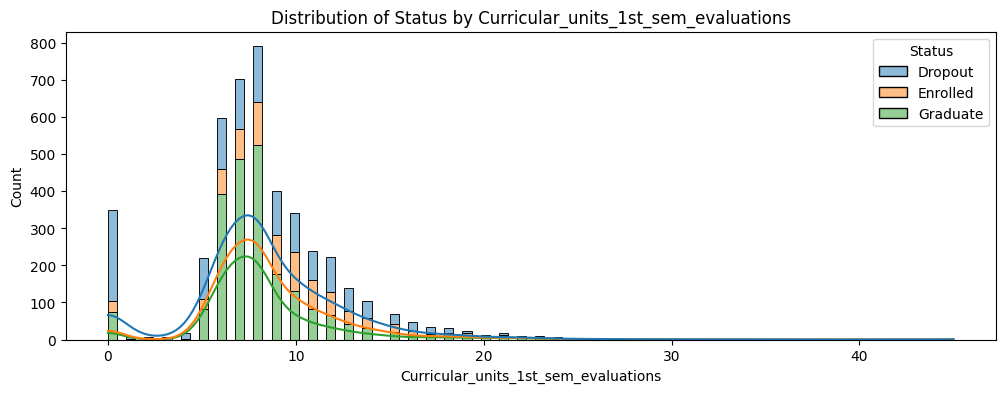

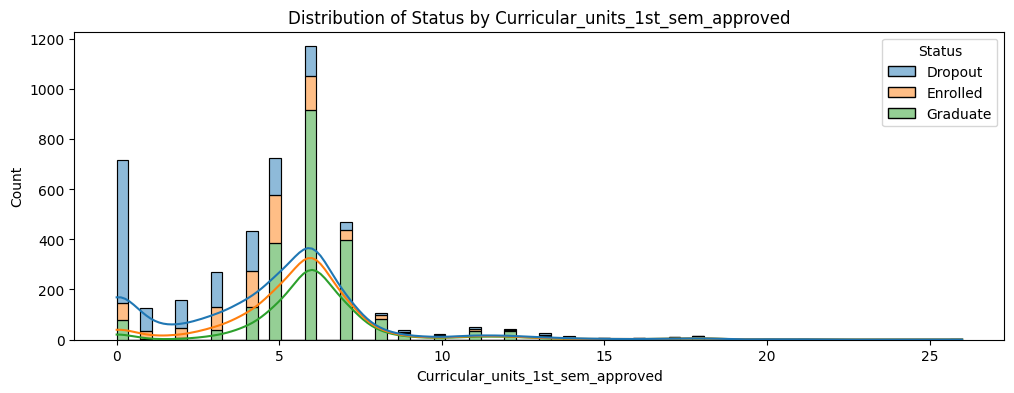

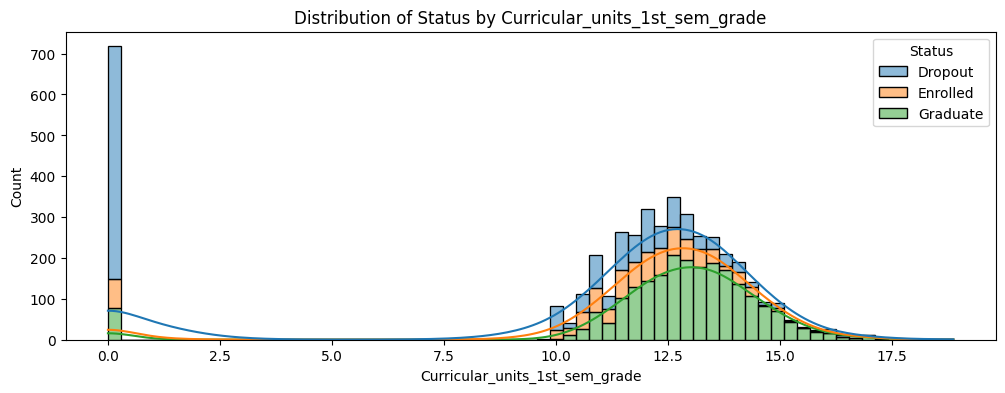

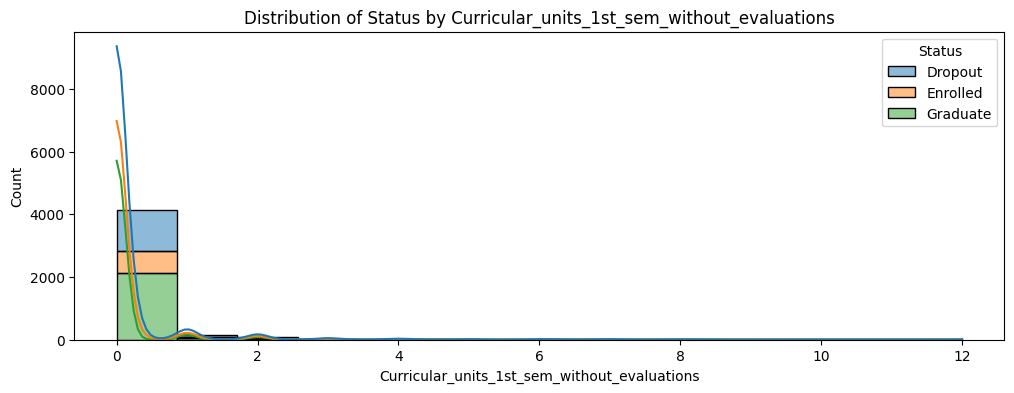

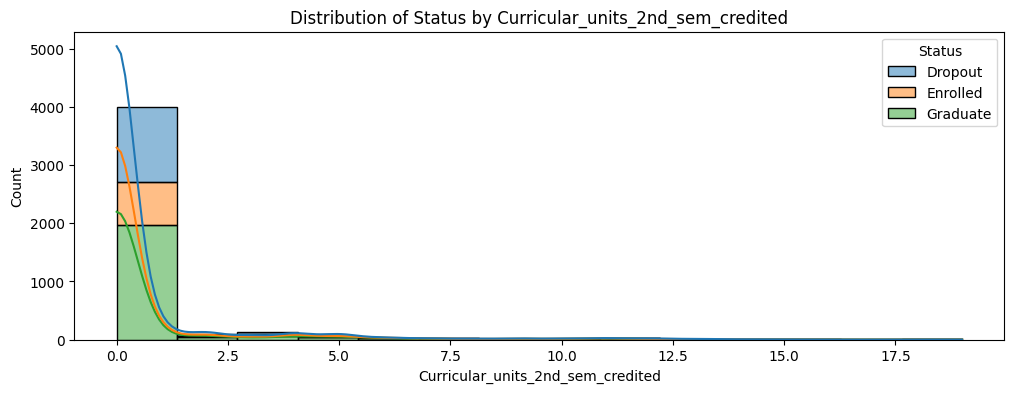

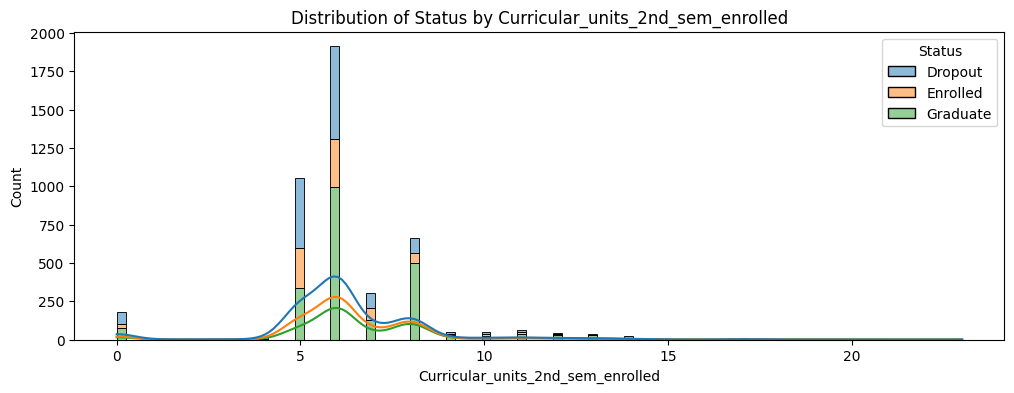

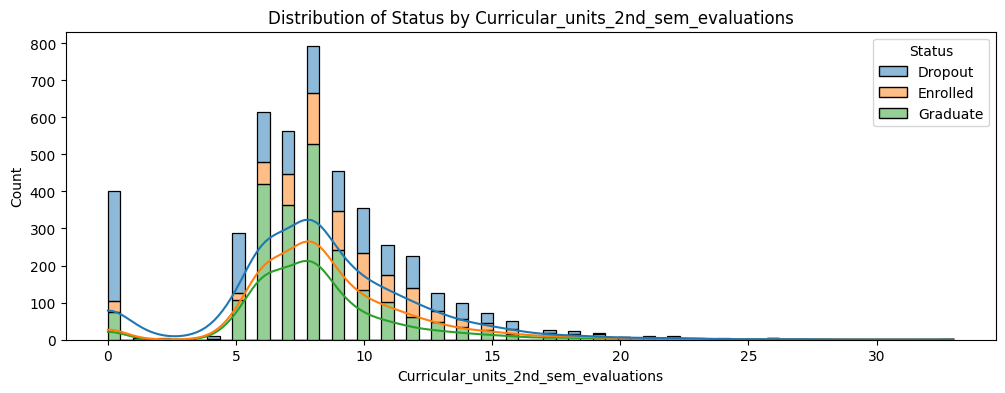

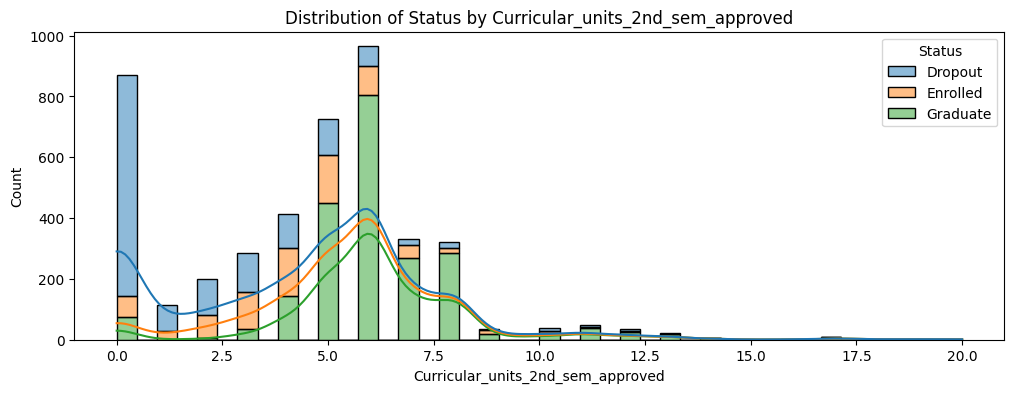

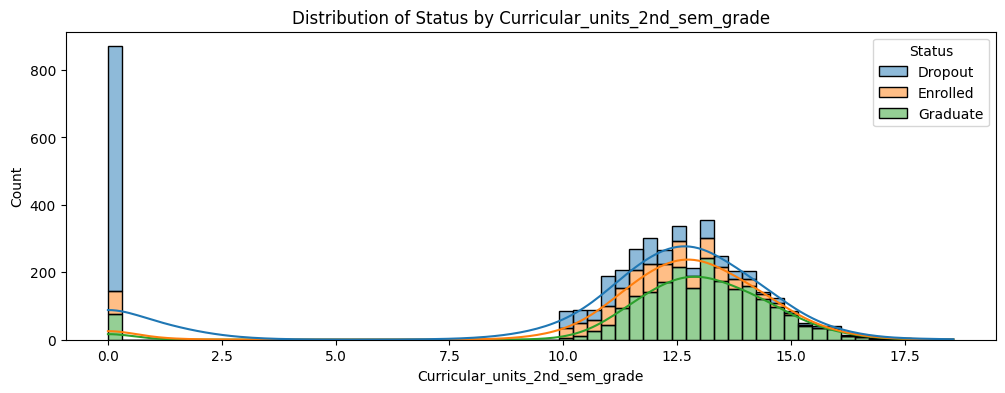

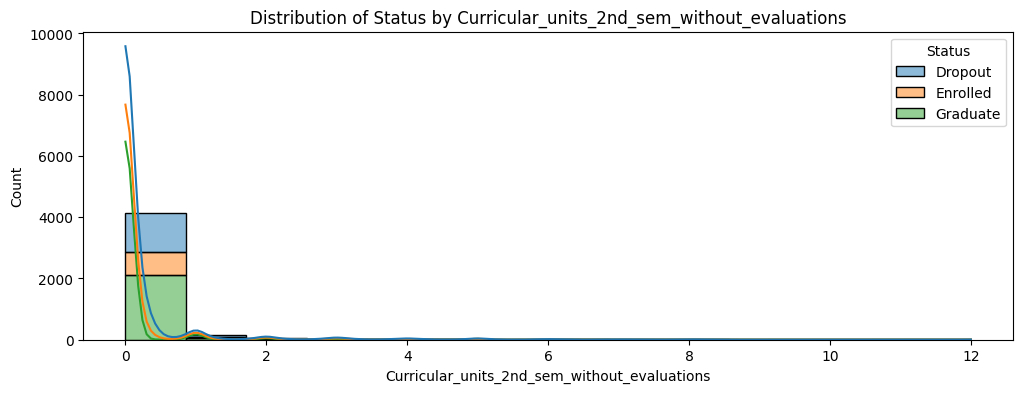

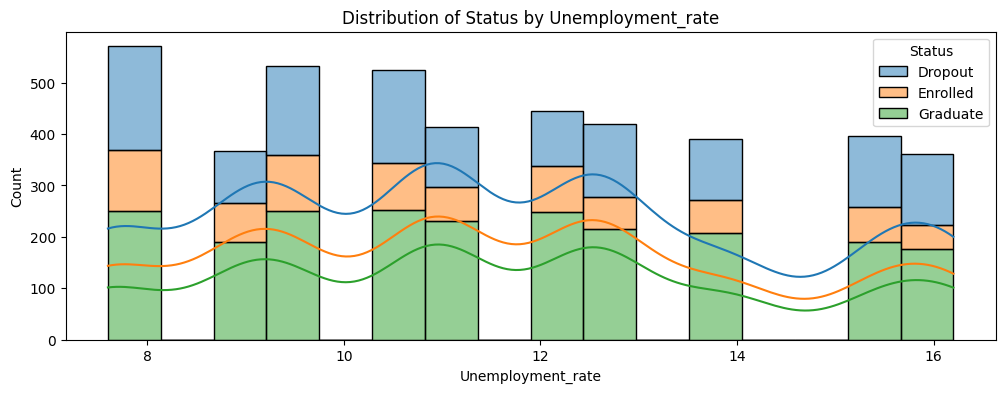

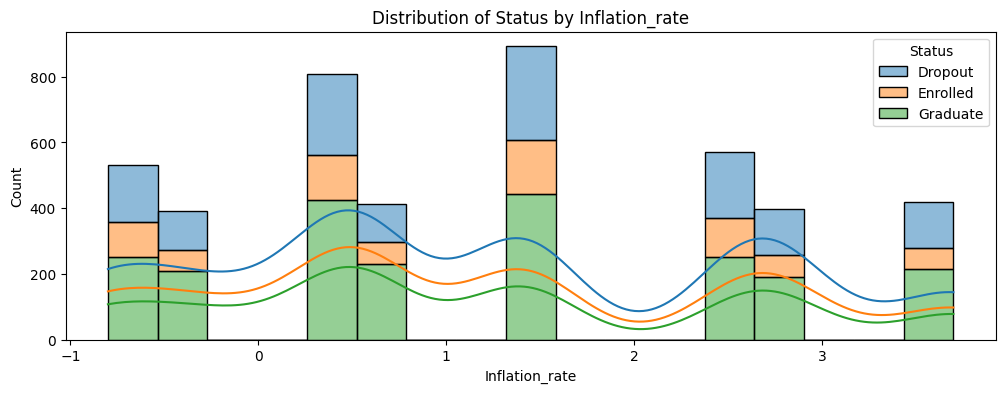

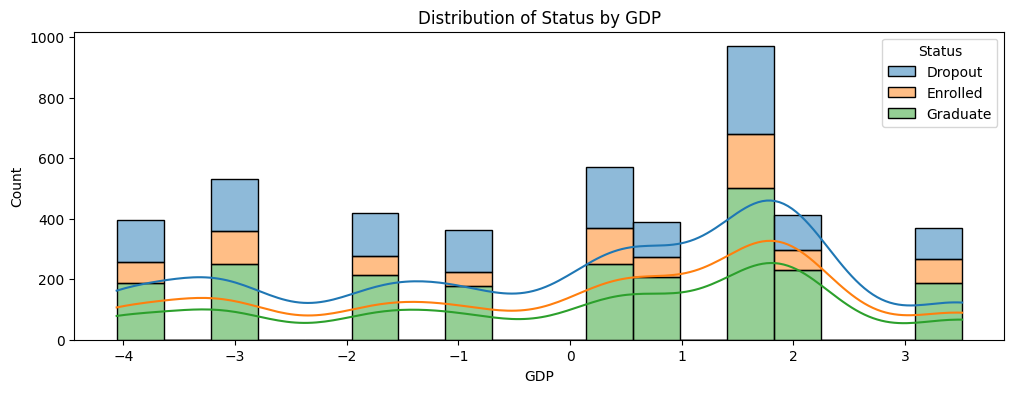

In [38]:
for col in numeric_column:
  plt.figure(figsize=(12,4))
  sns.histplot(data=df, x=col, hue="Status", kde=True, multiple="stack")
  plt.title(f"Distribution of Status by {col}")
  plt.show()

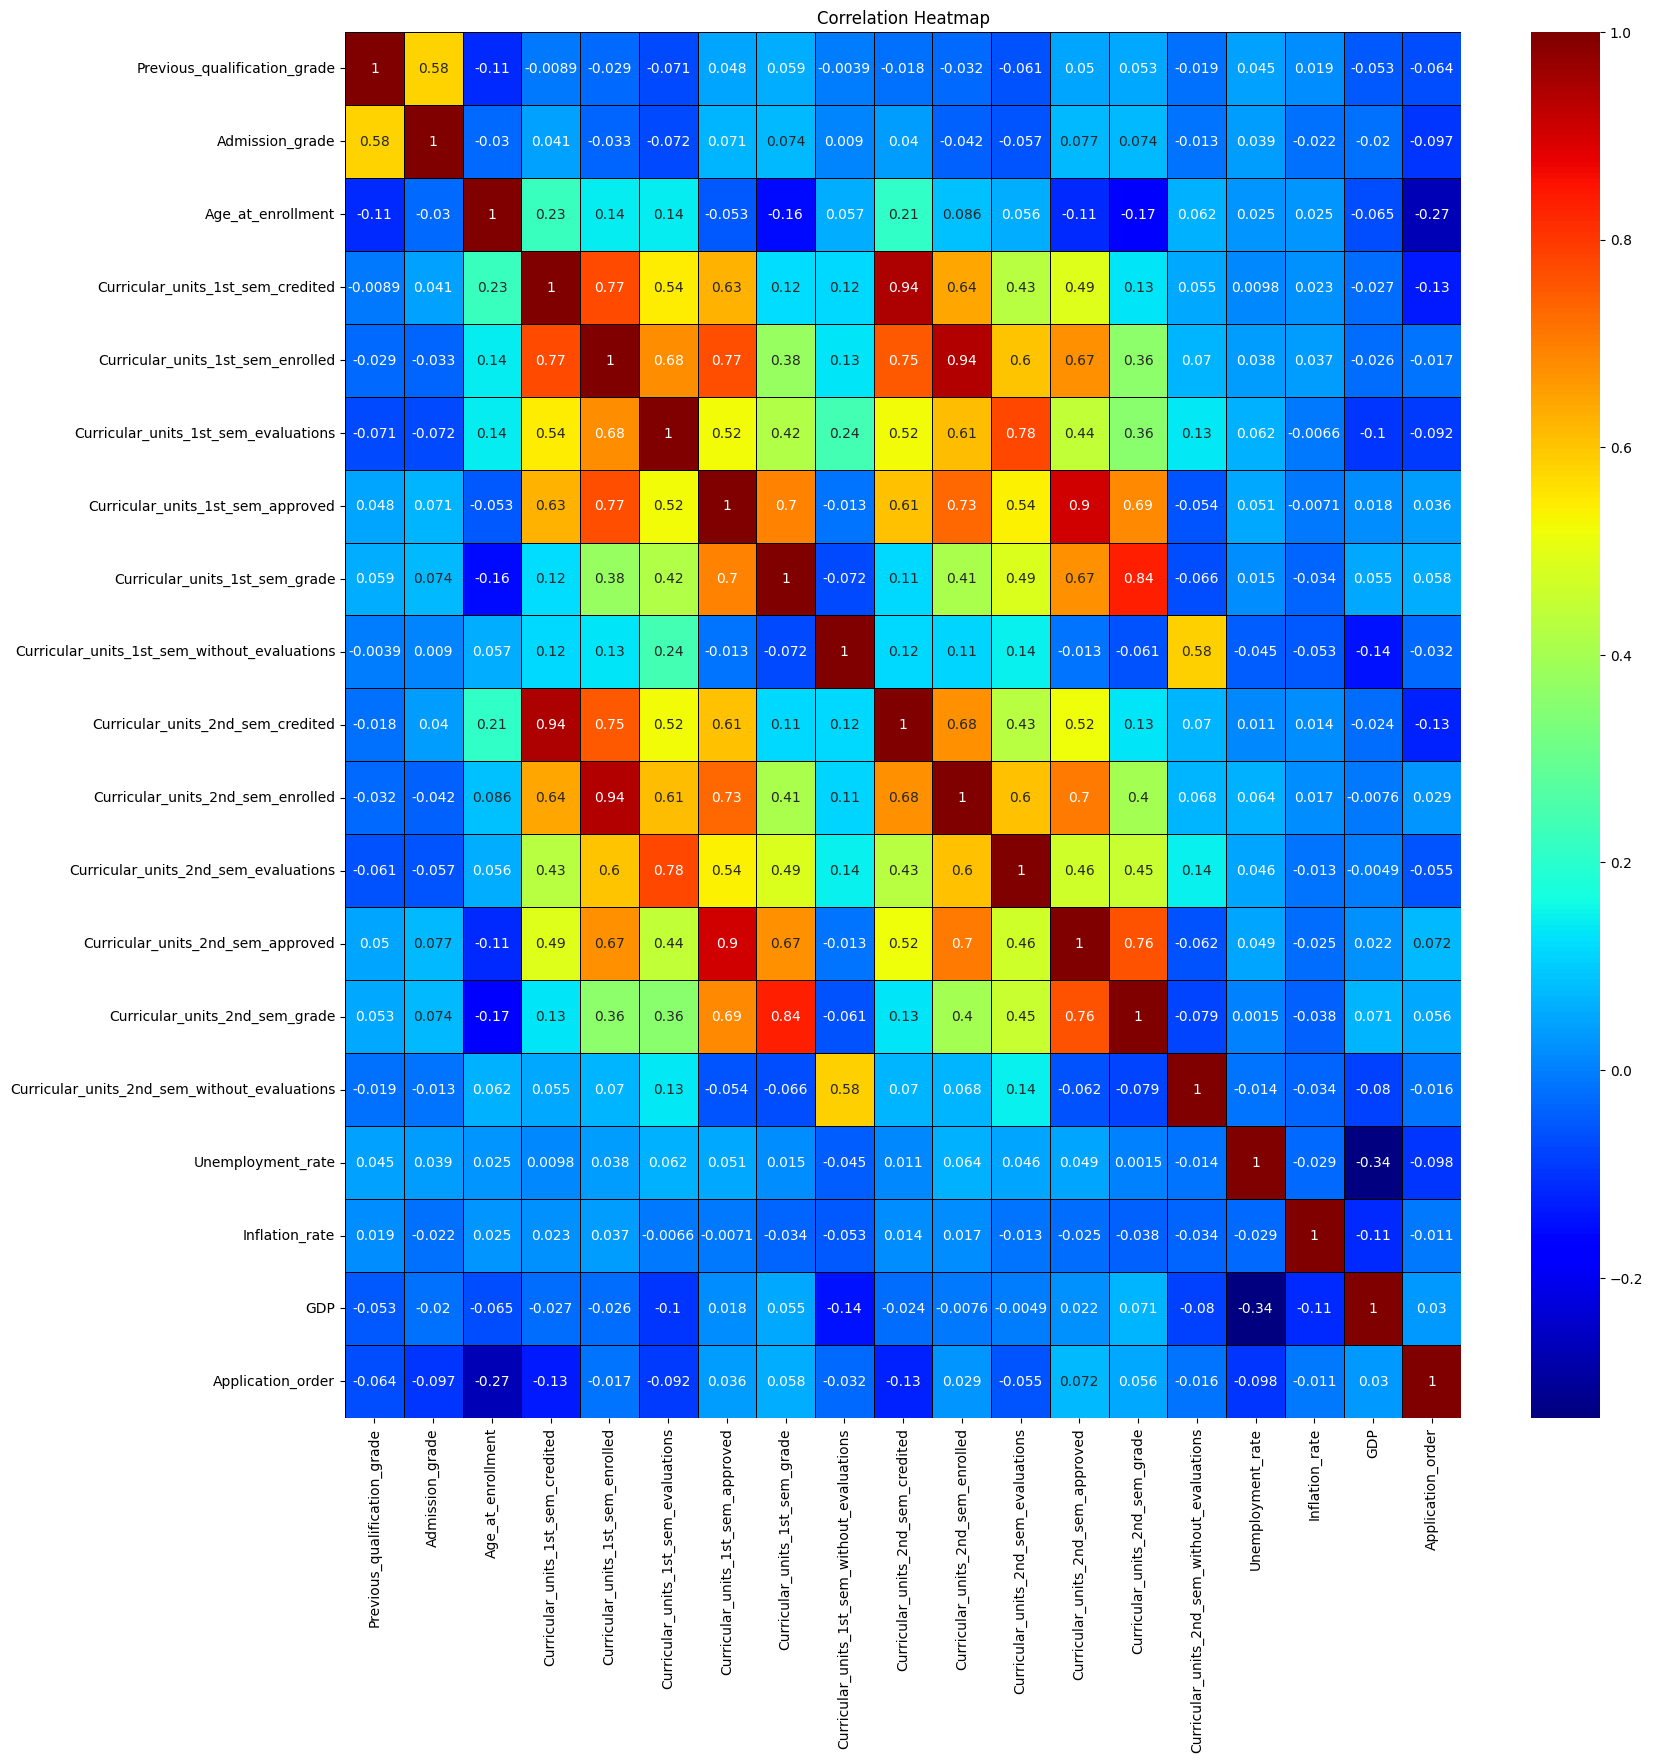

In [39]:
plt.figure(figsize=(18,18))
sns.heatmap(df[numeric_column + ordinal_column].corr(), annot=True, cmap="jet", linecolor="black", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Feature selection

Berdasarkan heatmap pada proses sebelumnya. Akan dipilih beberapa feature yang tampak masuk akal untuk dipilih, dan memilih kolom yang tidak berkorelasi tinggi.

In [40]:
selected_feature = ["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment", "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations",
                    "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade", "Application_order", "Application_mode", "Debtor", "Scholarship_holder", "Tuition_fees_up_to_date", "Daytime_evening_attendance", "Gender", "Displaced"]
# selected_feature = ["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment", "Application_order",
#                     "Application_mode", "Debtor", "Scholarship_holder", "Tuition_fees_up_to_date", "Daytime_evening_attendance"]

## Data preprocessing and Modeling

In [41]:
target = "Status"
df = df[selected_feature + [target]].copy()

membagi dataset untuk train dan test dengan ratio 0.2

In [42]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
print(train_df.shape)
print(test_df.shape)

(3539, 17)
(885, 17)


### over sampling

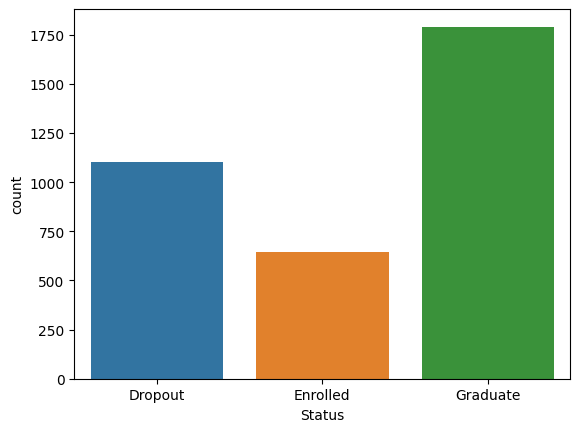

In [43]:
sns.countplot(data=train_df, x="Status", hue="Status")
plt.show()

Terlihat bahwa distribusi label pada dataset tidak seimbang dan perlu diseimbangkan untuk meningkatkan performa model nanti

In [44]:
train_df['Status'].value_counts()

Status
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64

In [45]:
status_count = train_df['Status'].value_counts()
sorted_status = status_count.sort_values(ascending=False)

df_majority_1 = train_df[train_df['Status'] == sorted_status.index[0]]
df_majority_2 = train_df[train_df['Status'] == sorted_status.index[1]]
df_minority   = train_df[train_df['Status'] == sorted_status.index[-1]]

df_minority_oversampled = resample(df_minority, n_samples=len(df_majority_1), random_state=42)
df_majority_2_oversampled = resample(df_majority_2, n_samples=len(df_majority_1), random_state=42)
print(df_minority_oversampled.shape)
print(df_majority_2_oversampled.shape)

(1791, 17)
(1791, 17)


In [46]:
oversampled_train_df = pd.concat([df_majority_1, df_majority_2_oversampled, df_minority_oversampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True)
oversampled_train_df.sample(10)

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Application_order,Application_mode,Debtor,Scholarship_holder,Tuition_fees_up_to_date,Daytime_evening_attendance,Gender,Displaced,Status
4578,140.0,140.0,41,2,6,10,4,12.25,1,44,0,0,1,0,0,0,Enrolled
1252,130.0,120.2,22,0,6,9,6,14.67,1,1,0,0,1,1,1,1,Graduate
2013,130.0,128.3,18,0,6,12,3,12.00,5,1,0,1,0,1,0,1,Dropout
870,130.0,130.0,21,0,6,15,6,11.71,1,44,0,1,1,1,1,0,Graduate
469,150.0,150.0,22,0,6,9,6,13.43,1,44,0,1,1,1,1,1,Graduate
3610,130.0,130.8,22,0,5,5,0,0.00,1,43,0,0,1,1,1,0,Enrolled
4443,141.0,136.1,18,0,0,0,0,0.00,2,17,0,1,1,1,0,1,Enrolled
3563,116.0,109.0,23,0,6,6,6,13.33,4,17,0,1,1,1,0,0,Dropout
1815,130.0,117.9,35,0,1,1,0,0.00,1,39,0,0,1,1,0,0,Dropout
1982,116.0,127.6,19,0,6,7,6,13.86,2,1,0,1,1,1,0,1,Dropout


In [47]:
oversampled_train_df['Status'].value_counts()

Status
Dropout     1791
Enrolled    1791
Graduate    1791
Name: count, dtype: int64

In [48]:
oversampled_train_df.shape

(5373, 17)

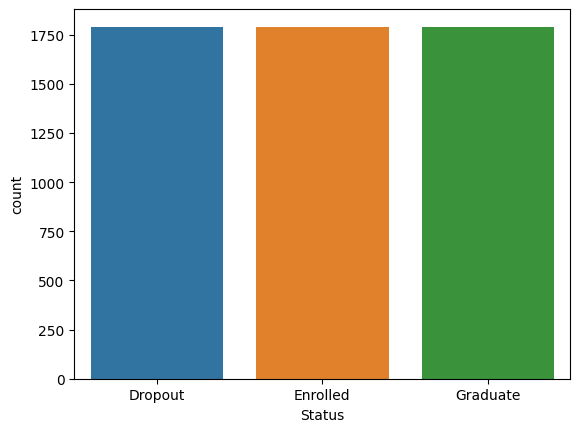

In [49]:
sns.countplot(data=oversampled_train_df, x="Status", hue="Status")
plt.show()

### Split X and Y

In [50]:
X_train = oversampled_train_df[selected_feature]
y_train = oversampled_train_df["Status"]

X_test = test_df[selected_feature]
y_test = test_df["Status"]

### Encoding and scaling

Melakukan preprocessing lalu menyimpan hasil preprocessor dan feature column menggunakan joblib untuk proses prediksi nanti

In [51]:
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ("num", scaler, [item for item in numeric_column if item in selected_feature]),
    ("cat", onehot_encoder, [item for item in categorical_column if item in selected_feature]),
    ("ord", ordinal_encoder, [item for item in ordinal_column if item in selected_feature])
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

joblib.dump(preprocessor, "model/preprocessor.joblib")

feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "model/feature_columns.joblib")

def get_features_name(ct):
    output_features = []

    for name, transformer, columns in ct.transformers_:
        if name == "remainder":
            continue
        if hasattr(transformer, "get_feature_names_out"):
            feature_names = transformer.get_feature_names_out(columns)
        else:
            feature_names = columns
        output_features.extend(feature_names)
    return output_features

features_name = get_features_name(preprocessor)

In [52]:
l_encoder = LabelEncoder()
y_train_encoded = l_encoder.fit_transform(y_train)
y_test_encoded = l_encoder.transform(y_test)

joblib.dump(l_encoder, "model/label_encoder.joblib")

['model/label_encoder.joblib']

### Modeling

melakukan modeling dengan mencoba beberapa algoritma dan melatihnya menggunakan gridsearch

In [53]:
param_grids = {
    "logistic_regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
        }
    },
    "decision_tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
        }
    },
    "xgboost": {
        "model": XGBClassifier(
            objective="multi:softprob",
            num_class=3,
            eval_metric="mlogloss",
            use_label_encoder=False,
            random_state=42,
        ),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2],
        }
    },
}


def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1][:10]
        top_features = [feature_names[i] for i in indices]

        plt.figure(figsize=(8, 5))
        sns.barplot(x=importances[indices], y=top_features, palette="viridis", hue=top_features)
        plt.title(f"Top 10 Feature Importances - {model_name}")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()


for name, config in param_grids.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        config["model"],
        config["params"],
        cv=5,
        scoring="f1_macro",
        n_jobs=-1
    )

    grid.fit(X_train_processed, y_train_encoded)
    config['result'] = grid




Tuning logistic_regression...

Tuning random_forest...

Tuning decision_tree...

Tuning xgboost...


c:\Users\imchu\projects\ds-mahir-submission-akhir\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Evaluation

Melihat hasil evaluasi model dan menyimpan model dengan parameter terbasik

Best parameters for logistic_regression: {'C': 1}
Classification report on test set:
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       316
           1       0.37      0.54      0.44       151
           2       0.82      0.79      0.80       418

    accuracy                           0.70       885
   macro avg       0.66      0.66      0.66       885
weighted avg       0.74      0.70      0.71       885



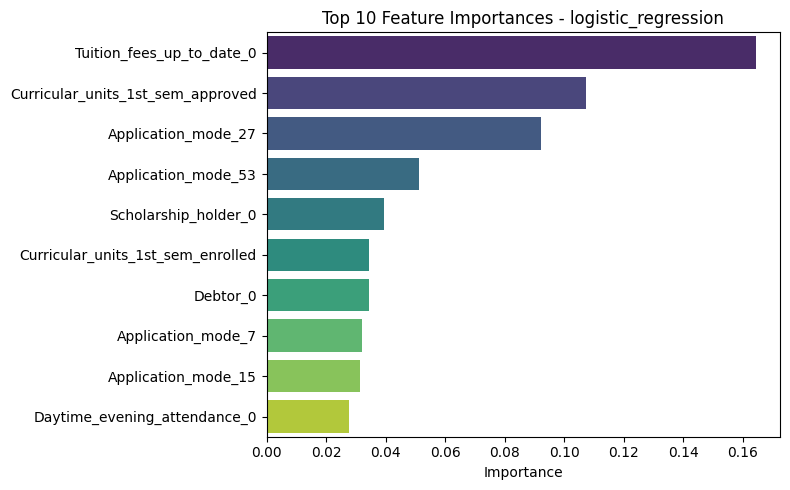

Best parameters for random_forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Classification report on test set:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       316
           1       0.40      0.34      0.36       151
           2       0.76      0.88      0.81       418

    accuracy                           0.72       885
   macro avg       0.66      0.64      0.64       885
weighted avg       0.72      0.72      0.72       885



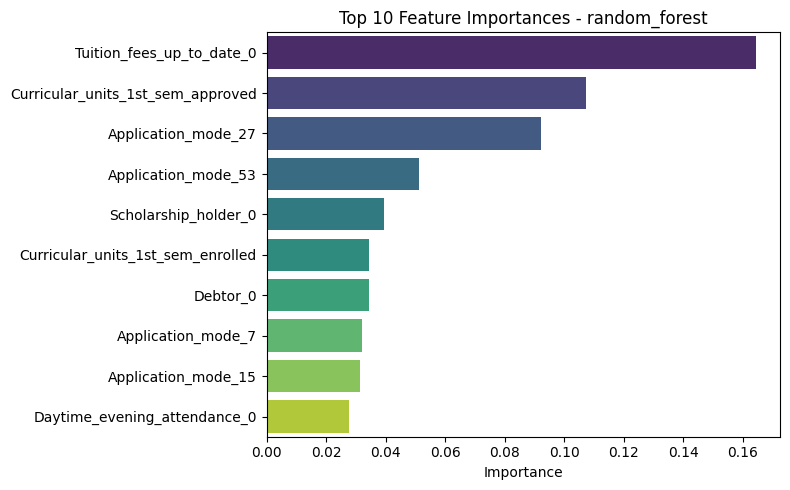

Best parameters for decision_tree: {'max_depth': None, 'min_samples_split': 2}
Classification report on test set:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       316
           1       0.29      0.30      0.30       151
           2       0.73      0.76      0.74       418

    accuracy                           0.64       885
   macro avg       0.57      0.57      0.57       885
weighted avg       0.64      0.64      0.64       885



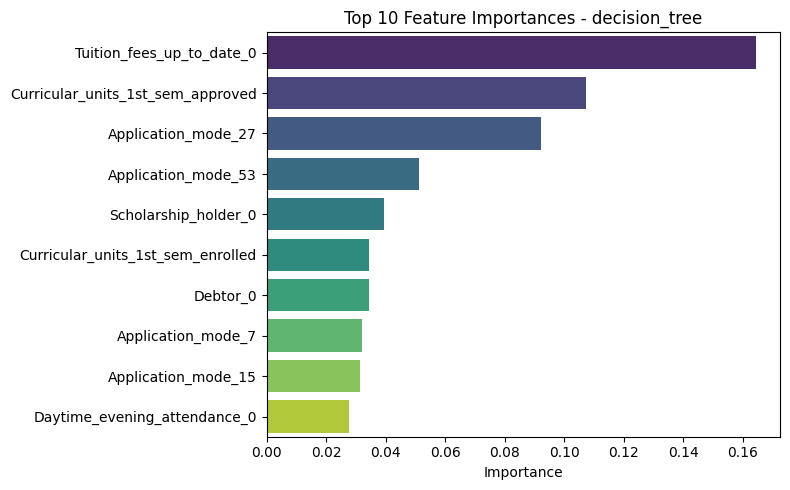

Best parameters for xgboost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Classification report on test set:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       316
           1       0.33      0.32      0.33       151
           2       0.76      0.84      0.80       418

    accuracy                           0.69       885
   macro avg       0.62      0.61      0.62       885
weighted avg       0.70      0.69      0.69       885



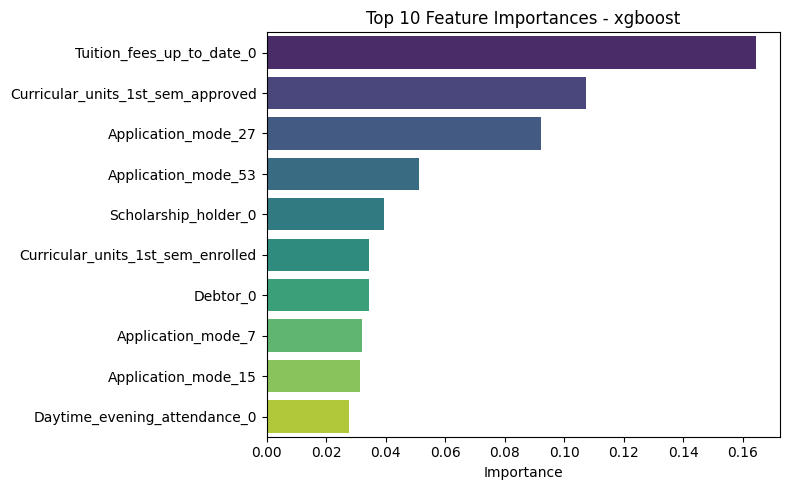

In [54]:
for name, config in param_grids.items():
    print(f"Best parameters for {name}: {config['result'].best_params_}")
    print("Classification report on test set:")
    y_pred = config['result'].predict(X_test_processed)
    print(classification_report(y_test_encoded, y_pred))

    plot_feature_importance(grid.best_estimator_, features_name, name)

    joblib.dump(grid.best_estimator_, f"model/{name}_model.joblib")